# **Lending club EDA Case Study**:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
lcs_data = pd.read_csv('loan.csv')
lcs_data.head()

C:\Users\cyber\AppData\Local\Temp\ipykernel_5556\2417993354.py:5: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  lcs_data = pd.read_csv('loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Understanding:

    * Lending Club is argest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 
    
    * Borrower applies for the loan(loan_amnt) by providing their income(annual_inc), credit quality score, professional experience(emp_length), and for what purpose they are applying the loan(purpose and title) and which place they are staying(addr_state) and are they staying in their own house / rent / mortgage (home_ownership)

    * Lending club shares the request with the investors.

    * If once they validated the details, they will share how much amount got approved by investors(funded_amnt_inv) and their rate of interest(int_rate) and (grade) and (sub_grade) will get decided

    * Borrower will choose the term period (term - 36 months / 60 months) to repay the amount along with the interest

### Procedure

 1. Data Understanding
 2. Data Cleaning
 3. Data Analysis
 4. Conclusion
 

### Data understanding:

In [2]:
# No.of rows, columns
lcs_data.shape

(39717, 111)

<Axes: ylabel='loan_status'>

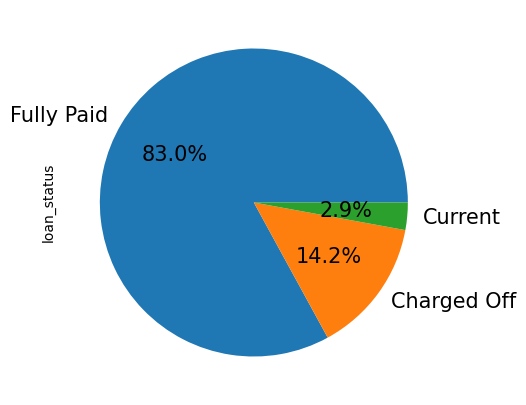

In [3]:
lcs_data.loan_status.value_counts(normalize=True).plot(kind='pie', figsize=[10,5], autopct="%.1f%%",fontsize=15)

In [4]:
#Basic information about the data
## Number of rows and columns
print('Number of Columns:',lcs_data.shape[1])
print('Number of Rows:',lcs_data.shape[0])
## Number of missing values
print('Number of missing values:',lcs_data.isnull().sum().sum())
## Number of unique values
print('Number of unique values:',lcs_data.nunique().sum())
## Number of duplicates
print('Number of duplicates:',lcs_data.duplicated().sum())

Number of Columns: 111
Number of Rows: 39717
Number of missing values: 2263364
Number of unique values: 416801
Number of duplicates: 0


In [5]:
# fetch if there are any null columns that are present in the 
lcs_data.info(verbose=True, null_counts=True)
#There are 54 columns in which values are null and can be dropped.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

C:\Users\cyber\AppData\Local\Temp\ipykernel_5556\3144931739.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  lcs_data.info(verbose=True, null_counts=True)


In [6]:
#Fetch unique columns in each columns
#if we have columns with same value then we can rollout that columns
lcs_data.describe(include='all').loc['unique', :]

id                            NaN
member_id                     NaN
loan_amnt                     NaN
funded_amnt                   NaN
funded_amnt_inv               NaN
                             ... 
tax_liens                     NaN
tot_hi_cred_lim               NaN
total_bal_ex_mort             NaN
total_bc_limit                NaN
total_il_high_credit_limit    NaN
Name: unique, Length: 111, dtype: object

In [7]:
#  analyse the column collections_12_mths_ex_med which has only two values 
# there only two values in the column collections_12_mths_ex_med which is 0 and NAN
lcs_data['collections_12_mths_ex_med'].unique()

array([ 0., nan])

In [8]:
# Policy has only one value
lcs_data['pymnt_plan'].unique()
# ===> It has only one value and correlation with other variables will be always 1 so we can remove it. 

array(['n'], dtype=object)

In [9]:
# dti_joint has only one value
lcs_data['dti_joint'].unique()
# It has only one value and correlation with other variables will be always 1 so we can remove it. 

array([nan])

In [10]:
#  Term has two values 36 months, 60 months
lcs_data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [11]:
lcs_data['pymnt_plan'].unique()
#It has only one value and correlation with other variables will be always 1 so we can remove it. 

array(['n'], dtype=object)

In [12]:
lcs_data['initial_list_status'].unique()
#  It has only one value and correlation with other variables will be always 1 so we can remove it. 

array(['f'], dtype=object)

In [13]:
lcs_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [14]:
lcs_data['loan_amnt'].describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

#### Loan amount is distributed will not have outliers as it is cash

In [15]:
lcs_data['funded_amnt'].describe()

count    39717.000000
mean     10947.713196
std       7187.238670
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

#### Funded amount will not have outliers as it is cash

In [16]:
#interest rate is in string and it has % postfix so it can be removed and converted to string
lcs_data['int_rate'].describe()

count      39717
unique       371
top       10.99%
freq         956
Name: int_rate, dtype: object

In [17]:
#It has only one value and correlation with other variables will be always 1 so we can remove it. 
lcs_data['initial_list_status'].unique()

array(['f'], dtype=object)

In [18]:
#Loan status 3 values Fully Paid, Charged Off, Current
#Charged off is defaulted customers
lcs_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

### Data cleaning:

**Remove all null columns**

In [19]:
#Dropping all null coumns as it doesnt have any impact on analysis
lcs_data.dropna(how='all', inplace=True, axis='columns')
lcs_data.shape

(39717, 57)

#### Drop columns where there is only one value

In [20]:
# remove the columns where there is only one value... it's correlation is always 1
lcs_data.drop(columns=['policy_code', 'application_type', 'initial_list_status'], inplace=True)
lcs_data.shape

(39717, 54)

In [21]:
# ===> Remove columns where there is only 0/NAN 
print(lcs_data.tax_liens.unique())
lcs_data.drop(columns=['tax_liens', 'chargeoff_within_12_mths'], inplace=True)
lcs_data.shape

[ 0. nan]


(39717, 52)

In [22]:
print(lcs_data.collections_12_mths_ex_med.unique())
lcs_data.drop(columns=['collections_12_mths_ex_med'], inplace=True)
lcs_data.shape

[ 0. nan]


(39717, 51)

##### Add column with defaulted who are charged off with 1 and 0

In [23]:
lcs_data['defaulted'] = lcs_data['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)
lcs_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,defaulted
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,0.00,0.00,Jan-15,171.62,NaN,May-16,0,0,0.0,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0,0,0.0,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,0.00,0.00,Jun-14,649.91,NaN,May-16,0,0,0.0,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0,0,0.0,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,0.00,0.00,May-16,67.79,Jun-16,May-16,0,0,0.0,0


**Check if there are any columns with most of them null values which can be deleted**

In [24]:
total = lcs_data.isnull().sum().sort_values(ascending=False)
percent = (lcs_data.isnull().sum()/lcs_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(100)

,Total,Percent
next_pymnt_d,38577,0.971297
mths_since_last_record,36931,0.929854
mths_since_last_delinq,25682,0.646625
desc,12940,0.325805
emp_title,2459,0.061913
emp_length,1075,0.027066
pub_rec_bankruptcies,697,0.017549
last_pymnt_d,71,0.001788
revol_util,50,0.001259
title,11,0.000277


In [25]:
# There are 3 columns with most of them are null values which shown above can be removed.
lcs_data.drop(columns=['next_pymnt_d', 'mths_since_last_record', 'mths_since_last_delinq'], inplace=True)
lcs_data.shape

(39717, 49)

**Print meta about each columns which can be removed if there are any outliers**

In [26]:

for k in lcs_data:
    print(k)
    print('-----------')
    print(lcs_data[k].describe())
    print('-----------')

id
-----------
count    3.971700e+04
mean     6.831319e+05
std      2.106941e+05
min      5.473400e+04
25%      5.162210e+05
50%      6.656650e+05
75%      8.377550e+05
max      1.077501e+06
Name: id, dtype: float64
-----------
member_id
-----------
count    3.971700e+04
mean     8.504636e+05
std      2.656783e+05
min      7.069900e+04
25%      6.667800e+05
50%      8.508120e+05
75%      1.047339e+06
max      1.314167e+06
Name: member_id, dtype: float64
-----------
loan_amnt
-----------
count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64
-----------
funded_amnt
-----------
count    39717.000000
mean     10947.713196
std       7187.238670
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64
-----------
funded_amnt_inv
-----------
count    39717

In [27]:
#From the above analysis we can get that there are columns with simply "0" as the value and can't have any effect
#Can be removed from the dataset
print(lcs_data['delinq_amnt'].unique())
lcs_data.drop(columns=['acc_now_delinq'], inplace=True)
lcs_data.drop(columns=['delinq_amnt'], inplace=True)
lcs_data.shape

[0]


(39717, 47)

In [28]:
lcs_data.drop(columns=['pymnt_plan'], inplace=True)
lcs_data.shape

(39717, 46)

In [29]:
# ====> Remove columns
lcs_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'defaulted'],
      dtype='object')

### Data analysis

### Univariate

<Axes: xlabel='loan_amnt', ylabel='Count'>

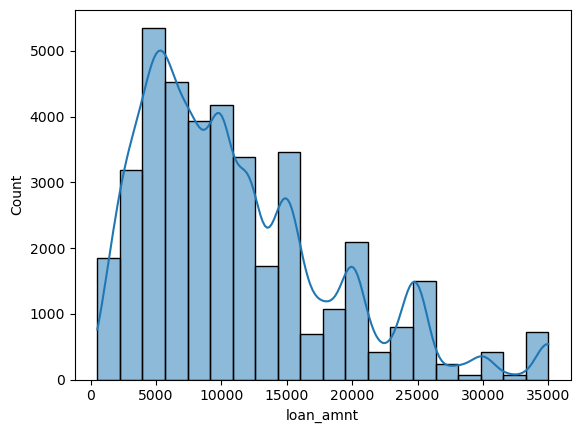

In [30]:
#Hist plot of the loan_amnt
sns.histplot(lcs_data.loan_amnt, bins = 20,kde=True)

**Understanding: Most of the loan amounts are in the range of 0-15K dollars**

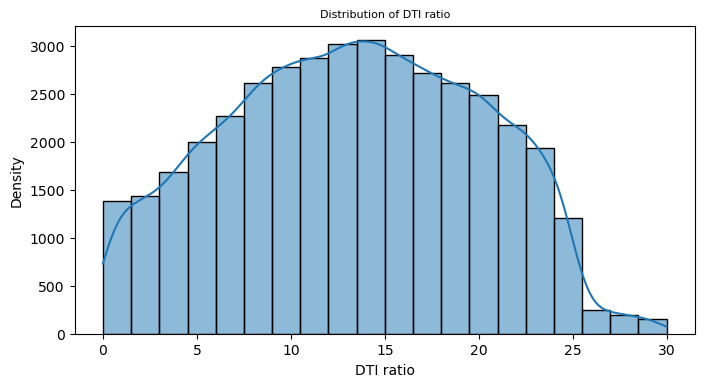

In [31]:
# Distribution of dti
plt.figure(figsize=(8,4))
sns.histplot(lcs_data.dti,kde=True,bins=20)
plt.xlabel('DTI ratio')
plt.ylabel('Density')
plt.title('Distribution of DTI ratio',fontsize=8)
plt.show()

In [32]:
##**Understanding : Most of the borrowers have very large debt compared to the income in the 10-15 DTI ratio**

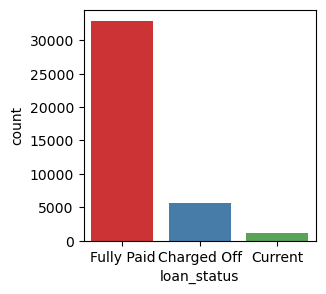

In [33]:
#Comparing Fully Paid,Charged Off and Current Loan status using bar plot
plt.figure(figsize=(3, 3))  # Set the figure size
# Create a countplot with different colors for each bar
sns.countplot(data=lcs_data, x='loan_status', palette='Set1')
plt.show()

grade
A    10085
B    12020
C     8098
D     5307
E     2842
F     1049
G      316
Name: grade, dtype: int64


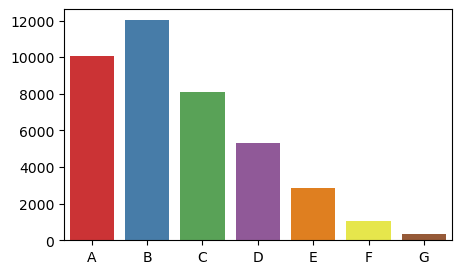

In [34]:
#Comparing the grades by representing in bar plot
print(lcs_data.groupby('grade').grade.count())
plt.figure(figsize=(5, 3))  # Set the figure size

# Calculate the count of each grade and sort the values in ascending order
grade_counts = lcs_data['grade'].value_counts().sort_index()

# Create a countplot with a custom color palette
sns.barplot(x=grade_counts.index, y=grade_counts.values, palette='Set1')
plt.show()

home_ownership
MORTGAGE    17659
NONE            3
OTHER          98
OWN          3058
RENT        18899
Name: home_ownership, dtype: int64


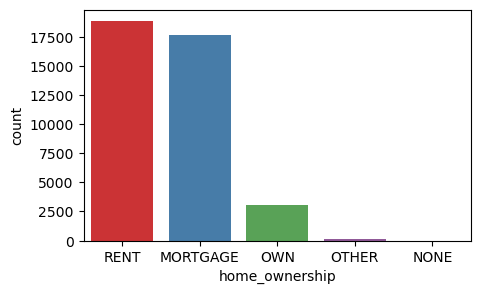

In [35]:
#Printing the Ownership status countplot
print(lcs_data.groupby('home_ownership').home_ownership.count())
plt.figure(figsize=(5, 3))  # Set the figure size

# Create a countplot without specifying the order parameter
order = lcs_data['home_ownership'].value_counts().index
sns.countplot(data=lcs_data, x='home_ownership', palette='Set1',order=order)
plt.show()

<Axes: xlabel='funded_amnt_inv', ylabel='Count'>

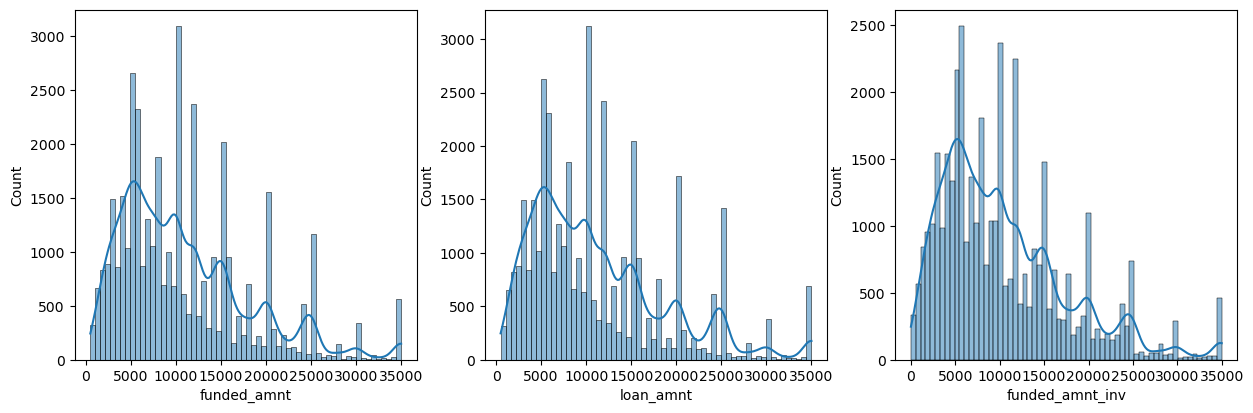

In [36]:
# funded ammout, loan amount, funded amount investment histplot
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
sns.histplot(lcs_data['funded_amnt'],kde=True)

plt.subplot(2, 3, 2)
sns.histplot(lcs_data['loan_amnt'],kde=True)

plt.subplot(2, 3, 3)
sns.histplot(lcs_data['funded_amnt_inv'],kde=True)

In [37]:
#pivot table using grade and loan status values and function sum
lcs_data.pivot_table(values = 'loan_amnt', index = ['grade', 'loan_status'], aggfunc = ['sum'])

sum
                   loan_amnt
grade loan_status           
A     Charged Off    4695550
      Current         406975
      Fully Paid    81879875
B     Charged Off   15540725
      Current        5987750
      Fully Paid   112122875
C     Charged Off   14876900
      Current        4387050
      Fully Paid    69851875
D     Charged Off   13644800
      Current        3439850
      Fully Paid    48075750
E     Charged Off   11332625
      Current        3281750
      Fully Paid    30423525
F     Charged Off    6147950
      Current        1602150
      Fully Paid    11513000
G     Charged Off    1872825
      Current         336025
      Fully Paid     4182825

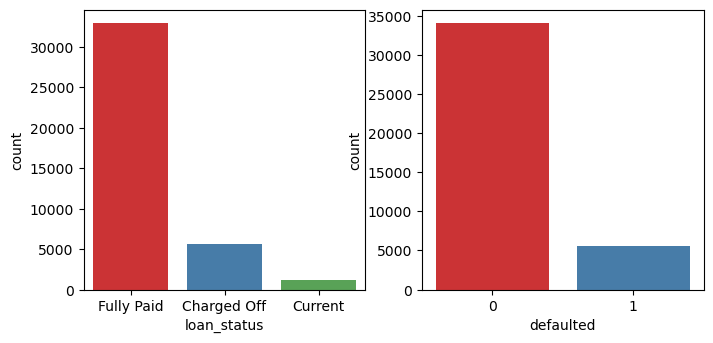

In [38]:
#Defaulted vs FullyPaid/Charged Off/Currently paying customers
#Defaulted vs FullyPaid/Currently paying customers 
plt.figure(figsize=(8,8))
plt.subplot(2, 2, 1)
sns.countplot(data=lcs_data, x='loan_status', palette='Set1')
plt.subplot(2, 2, 2)
sns.countplot(data=lcs_data, x='defaulted', palette='Set1')
plt.show()

In [39]:
lcs_data['defaulted'].describe()

count    39717.000000
mean         0.141677
std          0.348723
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: defaulted, dtype: float64

#### Defaulted vs Grades Bivariant for analysis:

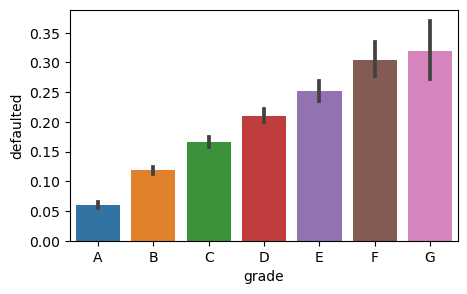

In [40]:
plt.figure(figsize=(5, 3))
order_grades = lcs_data.groupby(["grade"])['defaulted'].aggregate(np.mean).reset_index().sort_values('defaulted')
sns.barplot(data=lcs_data, y='defaulted', x='grade', order=order_grades['grade'])
plt.show()

* **Percentage of Defaulters are drawn above per grade**
* **High percentage of defaulters are in F & G with the order following from low as A, B, C, D, E, F, G

#### Defaulted vs Sub grades bivariant for analysis:

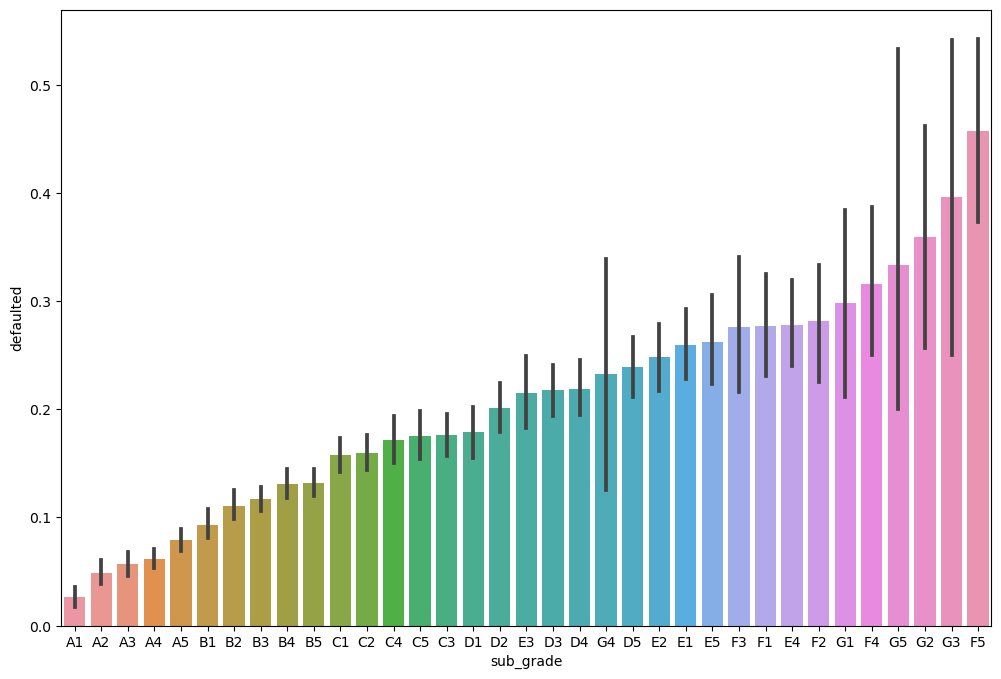

In [41]:
plt.figure(figsize=(12, 8))
order_sub_grades = lcs_data.groupby(["sub_grade"])['defaulted'].aggregate(np.mean).reset_index().sort_values('defaulted')
sns.barplot(data=lcs_data, y='defaulted', x='sub_grade', order=order_sub_grades['sub_grade'])
plt.show()

* **Percentage of Defaulters are drawn above per grade**
* **High percentage of defaulters are in F & G subgroups**

#### Defaulted vs Purpose of loan

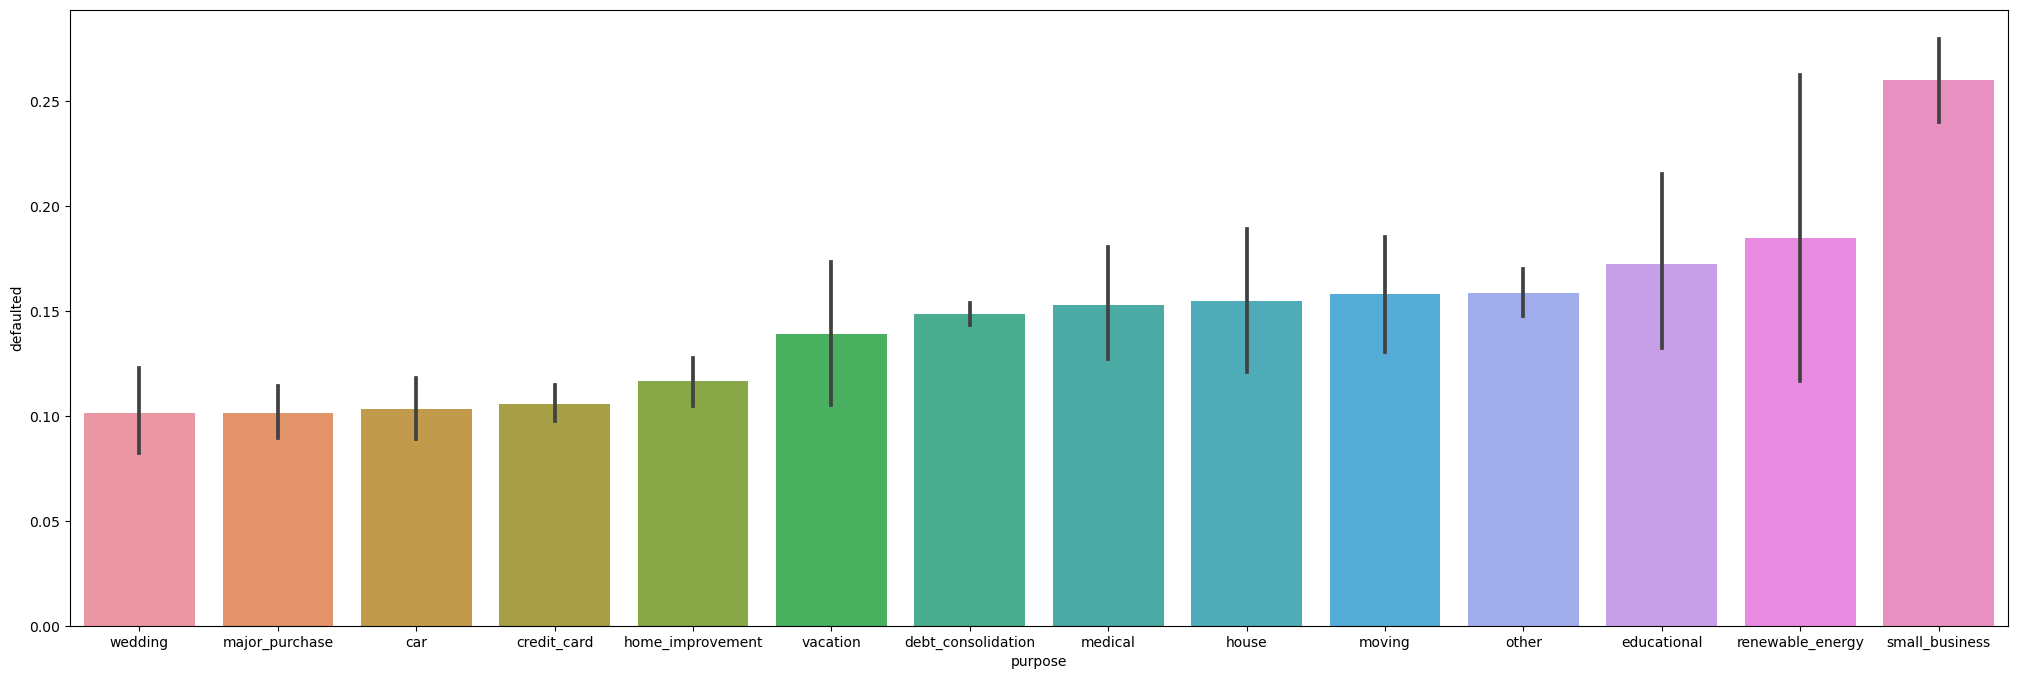

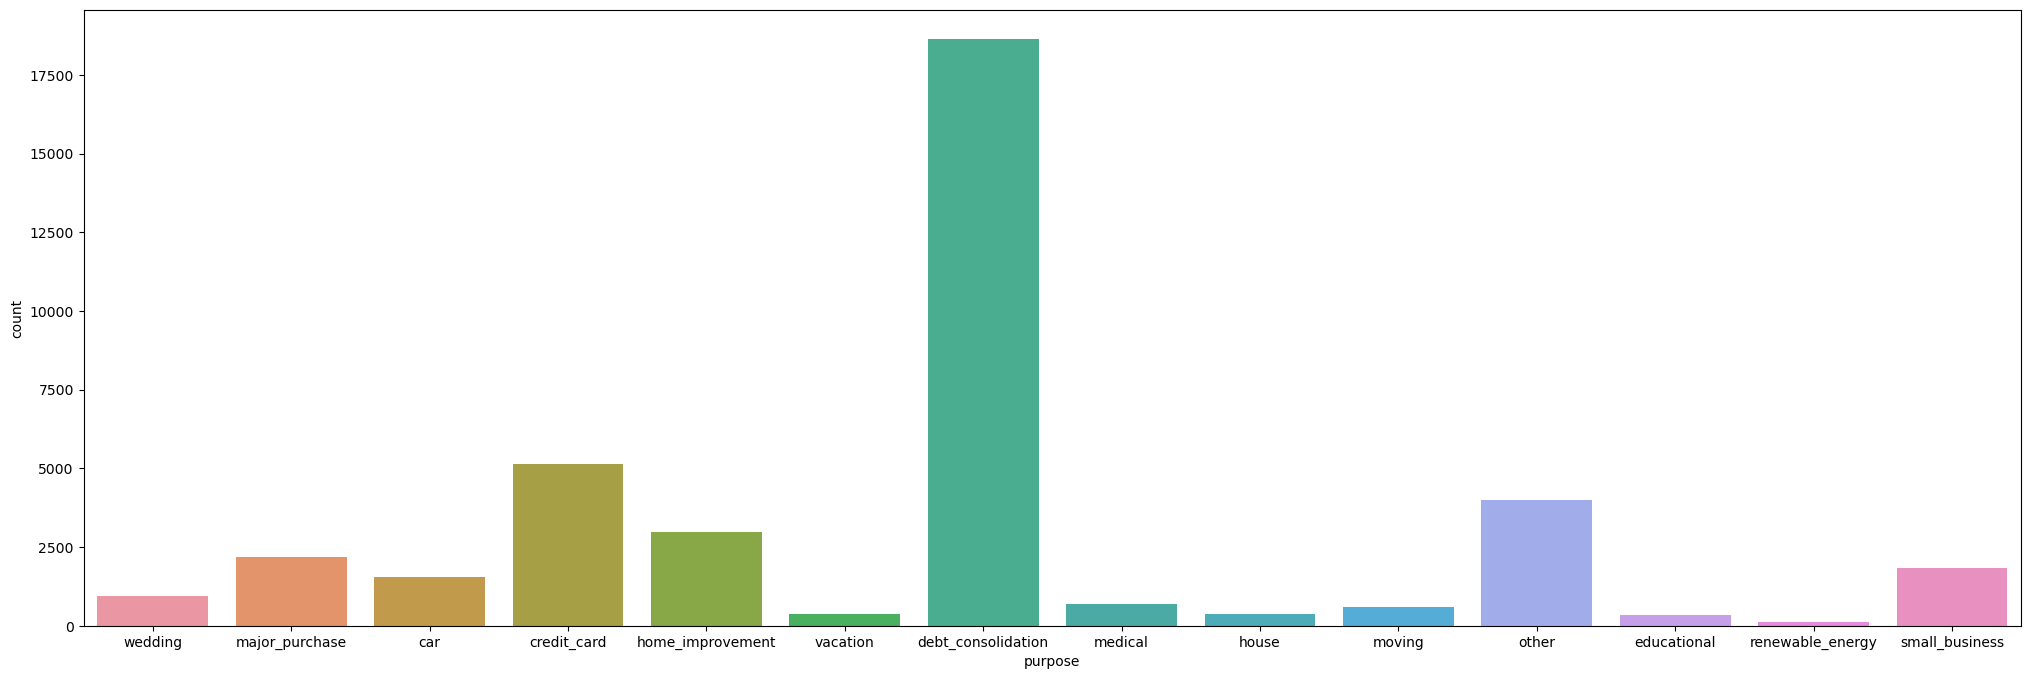

In [42]:
plt.figure(figsize=(25, 8))
order_business = lcs_data.groupby('purpose').defaulted.aggregate(np.mean).reset_index().sort_values('defaulted')
sns.barplot(data=lcs_data, y='defaulted', x='purpose', order=order_business['purpose'])
plt.show()

plt.figure(figsize=(25, 8))
sns.countplot(data=lcs_data, x='purpose', order=order_business['purpose'])
plt.show()

* Understanding: Trend of the defaulters there are more people from educational, renewable energy & small business people present.

#### Add year for the issue date to see if there are any relation with the year. 

In [43]:
lcs_data.issue_d = pd.to_datetime(lcs_data['issue_d'], format='%b-%y')
lcs_data.loc[:, 'issue_year'] = lcs_data.issue_d.dt.year
lcs_data.loc[:, 'issue_month'] = lcs_data.issue_d.dt.month
lcs_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,defaulted,issue_year,issue_month
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,0,2011,12
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,2011,12
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,0,2011,12
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,0,2011,12
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,0.00,0.00,0.00,May-16,67.79,May-16,0.0,0,2011,12


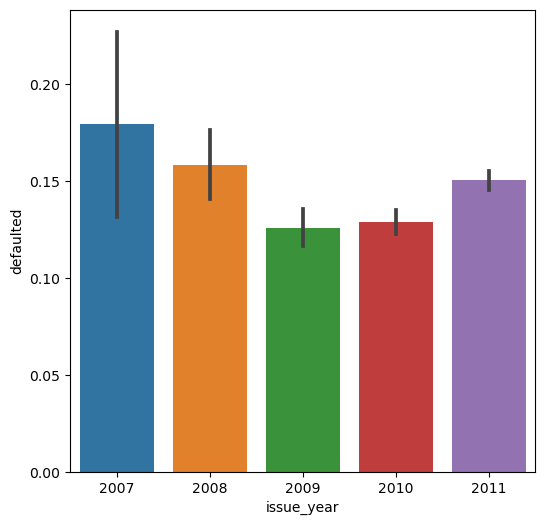

In [44]:
plt.figure(figsize=(6, 6))
sns.barplot(data=lcs_data, y='defaulted', x='issue_year')
plt.show()

#### Extract proper percentage of interest from the string and remove %

In [45]:
lcs_data.int_rate.replace('%', '', inplace=True, regex=True)
lcs_data.int_rate =lcs_data.int_rate.astype('float64')
lcs_data.int_rate.head()

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64

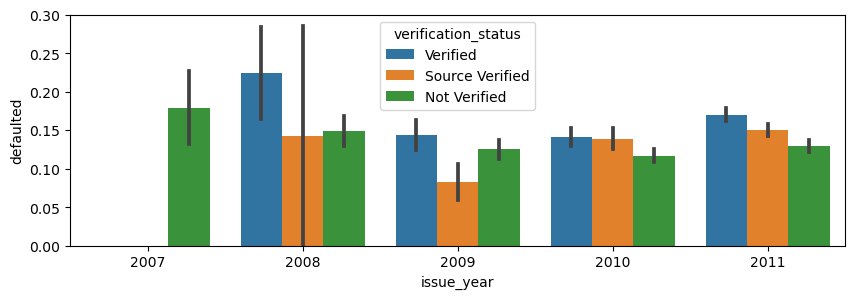

In [46]:
#defaulted users w.r.t to issue year and verification status
plt.figure(figsize=(10, 3))
sns.barplot(data=lcs_data, y='defaulted', x='issue_year',hue='verification_status')
plt.show()

In [47]:
def plot_range_with_defaults(_data, xcolumn, _bins=10, _width=10, _height=5, ycolumn='defaulted', action='cut'):
    plt.figure(figsize=(_width, _height))
    if (action == 'cut'):
        _ranges = pd.cut(_data[xcolumn], _bins)
    else:
        _ranges = pd.qcut(_data[xcolumn], _bins)
    _a = pd.DataFrame({ xcolumn : _ranges, ycolumn : _data[ycolumn]})
    sns.barplot(y=_a[ycolumn], x=_a[xcolumn])
    plt.show()

#### Defaulters w.r.t loan term:

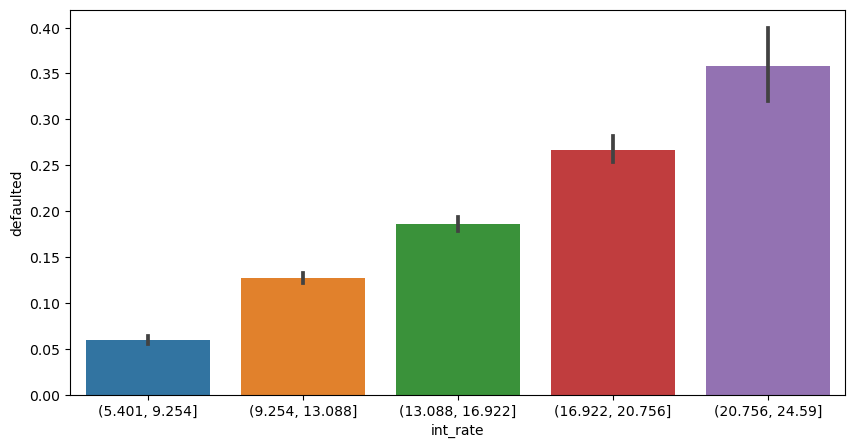

In [48]:
plot_range_with_defaults(lcs_data, 'int_rate', 5)

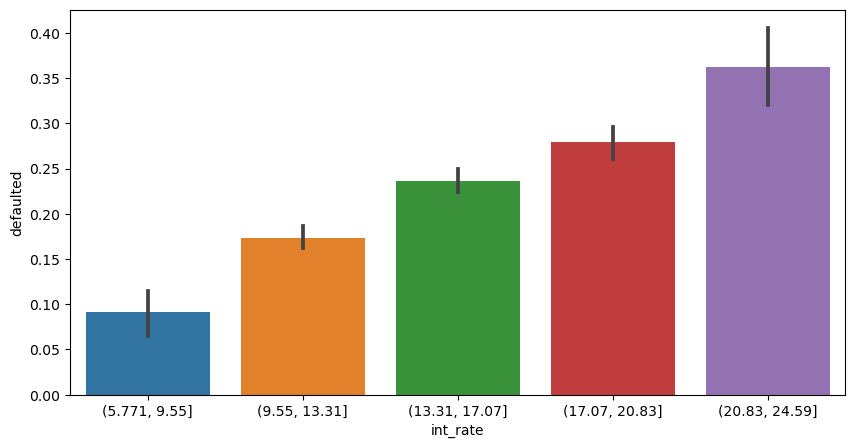

In [49]:
#60 months term
long_term_loan = lcs_data[lcs_data.term ==' 60 months']
plot_range_with_defaults(long_term_loan, 'int_rate', 5)

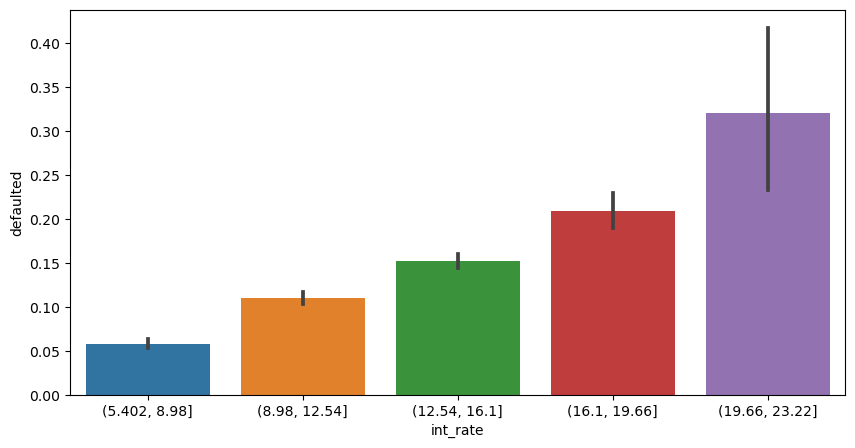

In [50]:
# 36 months term
short_term_loan = lcs_data[lcs_data.term ==' 36 months']
plot_range_with_defaults(short_term_loan, 'int_rate', 5)

###### Observation: There is a clear difference b/w tenure of 36months vs 60 months, for 36 months tenure there are less defaulters.


#### Defaulters w.r.t to annual income:

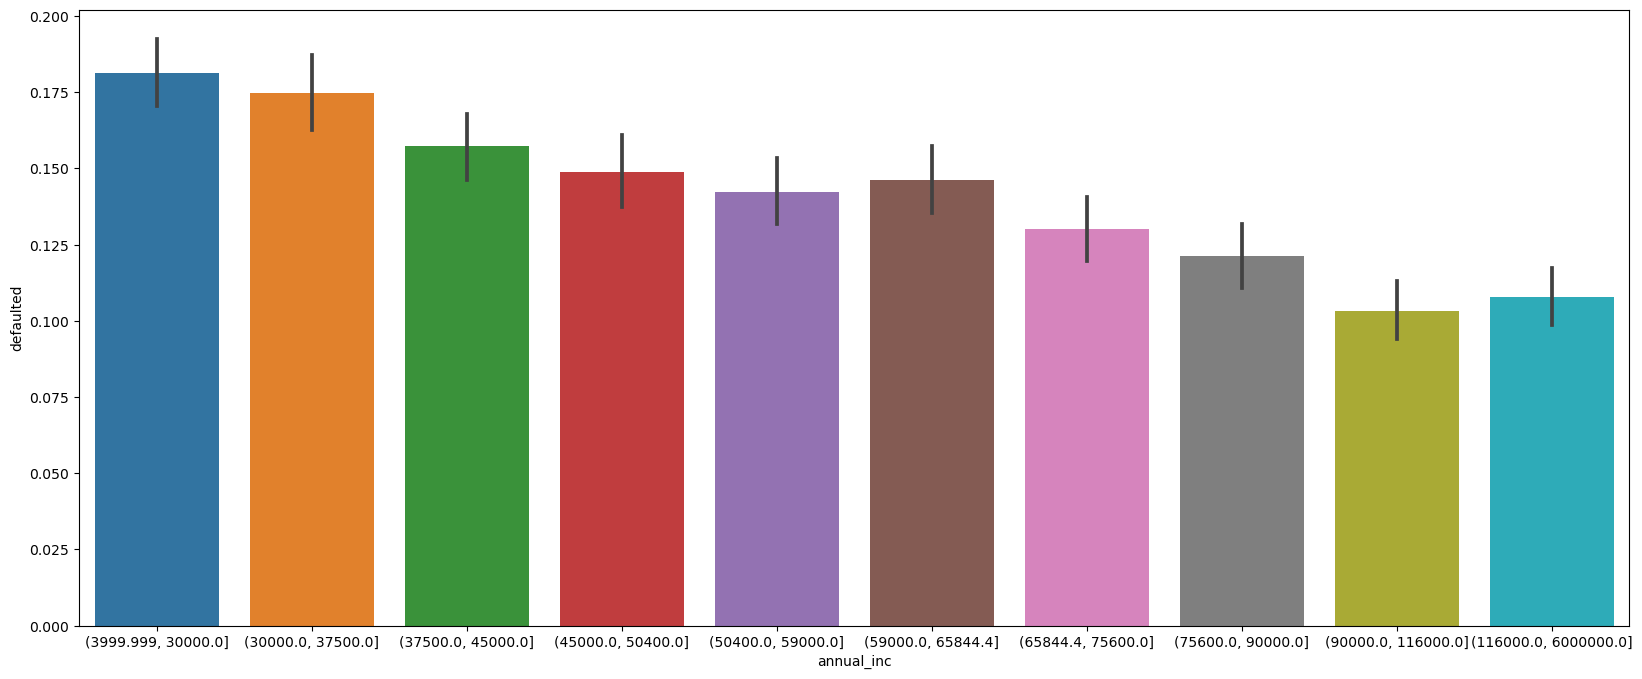

In [51]:
plot_range_with_defaults(lcs_data, 'annual_inc', 10, 20, 8, 'defaulted', 'qcut')

###### Observation: There is a clear decline in the defaulters as the annual income of the employee increases

#### Defaulters w.r.t to interest rate:

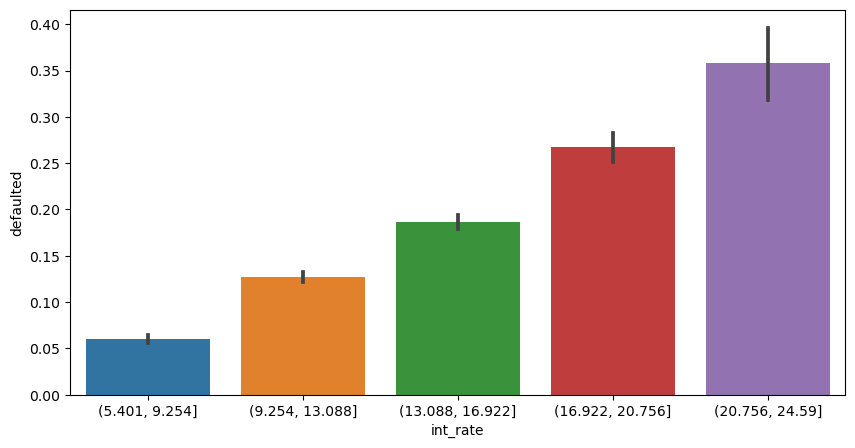

In [52]:
plot_range_with_defaults(lcs_data, 'int_rate', 5)

##### Observation: As the interest rate increases no.of defaulters are increasing 

#### Defaulters w.r.t to No.of accounts: 

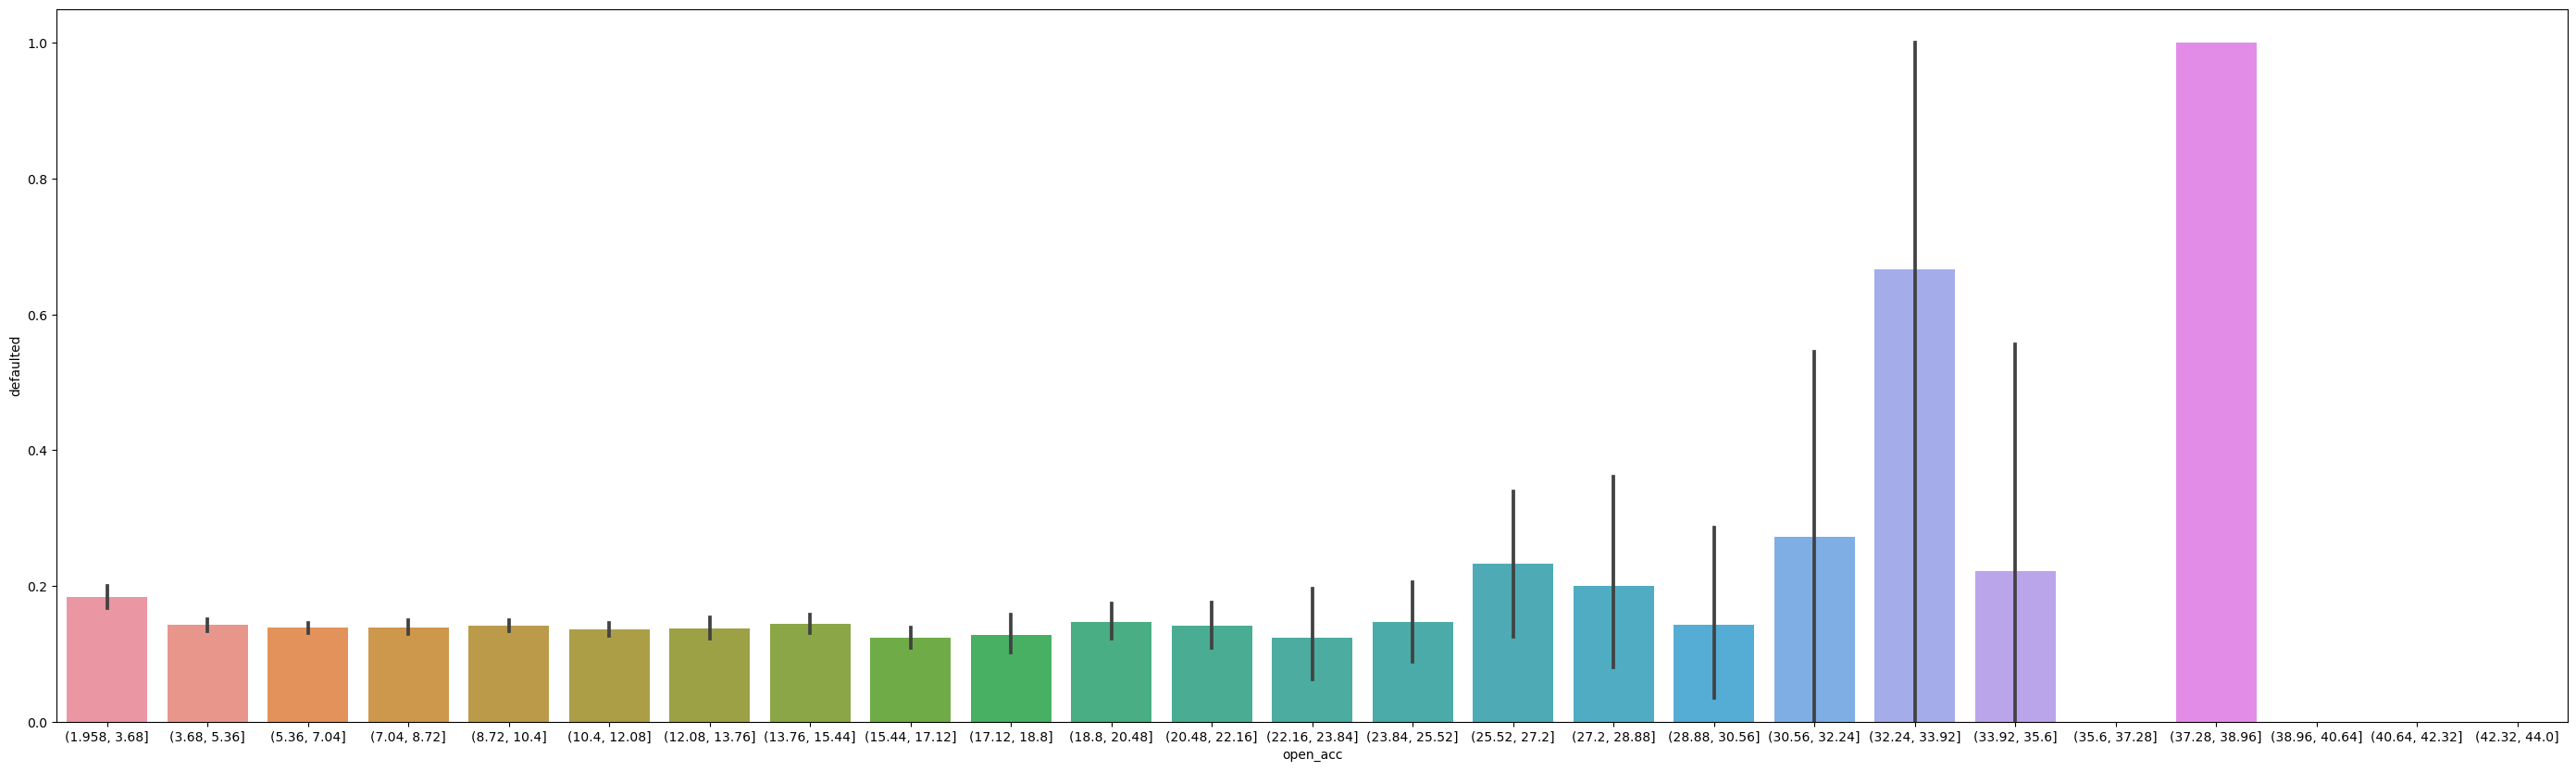

In [58]:
plot_range_with_defaults(lcs_data, 'open_acc', 25, 35, 10)

##### Observation: There is no much difference in the defaulters with no.of account holders except spike with no.of users being at 33 or 37-38 range

#### Defaulters w.r.t to employee experience:

In [54]:
lcs_data['emp_experience'] = lcs_data['emp_length'].astype('str') 
lcs_data['emp_experience'] = lcs_data['emp_experience'].apply(lambda x: x.split(' ')[0]).replace({'<': 0,'10+': 10},regex=True)
lcs_data['emp_experience'] = lcs_data['emp_experience'].astype('float64')
lcs_data.emp_experience.head()


0    10.0
1     0.0
2    10.0
3    10.0
4     1.0
Name: emp_experience, dtype: float64

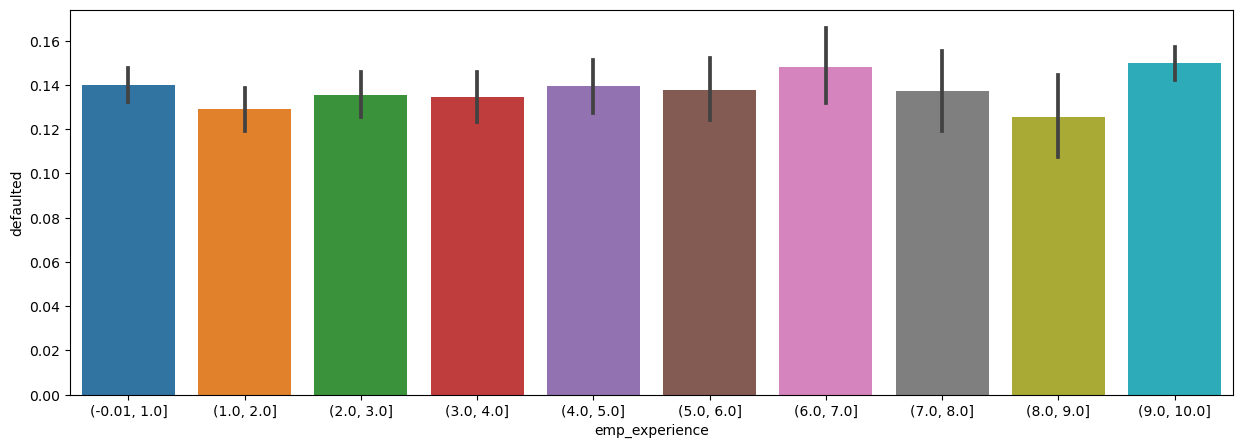

In [59]:
plot_range_with_defaults(lcs_data, 'emp_experience', 10, 15, 5, 'defaulted')

##### Observation: There is no much difference in the defaulters with years of experience

### Conclusion: 

**Below are the top variables that are impacting the defaulters:**

* **Grade, SubGrade**     -- As grade changes there are defaulters changing, G being the highest
* **Purpose of the loan** -- Small business has more defaulters
* **Interest rate**       -- As interest rate increases defaulters are moe 
* **Term**-- There are more defaulters with 60 months term than 36 months
* **Annual income**       -- If the annual income is more then high possibility that he pays the loan